In [1]:
import numpy as np

# gradient and differentiation

In [2]:
def f_2(x):
    return x[0]**2 + x[1]**2
#     return np.sum(x**2)

In [3]:
f_2(np.array([1,2]))

5

In [4]:
def numerical_gradient(f, x):
    gradient = np.zeros_like(x)
    h = 1e-4 # 0.0001
    for i in range(0, x.size):
        tmp_val = x[i]
        
        # f(x+h)
        x[i] = float(tmp_val) + h
        fx_right = f(x)
        # f(x-h)
        x[i] = float(tmp_val) - h
        fx_left = f(x)

        gradient[i] = (fx_right - fx_left) / (2*h)        
        x[i] = tmp_val
    return gradient

In [5]:
numerical_gradient(f_2, np.array([3.0, 4.0]))

array([6., 8.])

# plot f_2 with gradient

In [6]:
X0 = np.arange(-2.0, 2.1, 0.1)
X1 = np.arange(-2.0, 2.1, 0.1)

In [7]:
gradients = np.zeros((2,X0.size,X1.size))

In [8]:
for j, j_val in enumerate(X1): # fix direction of X1
    for i, i_val in enumerate(X0): # follow direction of X0
        point = np.array([i_val, j_val])
        gradient = numerical_gradient(f_2, point)
        gradients[0][j][i] = gradient[0]
        gradients[1][j][i] = gradient[1]
        if j < 1 and i < 2:
            print(j,i,point,gradient, gradients)

0 0 [-2. -2.] [-4. -4.] [[[-4.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  ...
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]]

 [[-4.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  ...
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]]]
0 1 [-1.9 -2. ] [-3.8 -4. ] [[[-4.  -3.8  0.  ...  0.   0.   0. ]
  [ 0.   0.   0.  ...  0.   0.   0. ]
  [ 0.   0.   0.  ...  0.   0.   0. ]
  ...
  [ 0.   0.   0.  ...  0.   0.   0. ]
  [ 0.   0.   0.  ...  0.   0.   0. ]
  [ 0.   0.   0.  ...  0.   0.   0. ]]

 [[-4.  -4.   0.  ...  0.   0.   0. ]
  [ 0.   0.   0.  ...  0.   0.   0. ]
  [ 0.   0.   0.  ...  0.   0.   0. ]
  ...
  [ 0.   0.   0.  ...  0.   0.   0. ]
  [ 0.   0.   0.  ...  0.   0.   0. ]
  [ 0.   0.   0.  ...  0.   0.   0. ]]]


In [9]:
# gradients[0] is the direction component of the arrow vector X0
# gradients[1] is the direction component of the arrow vector X1
gradients[0]

array([[-4. , -3.8, -3.6, ...,  3.6,  3.8,  4. ],
       [-4. , -3.8, -3.6, ...,  3.6,  3.8,  4. ],
       [-4. , -3.8, -3.6, ...,  3.6,  3.8,  4. ],
       ...,
       [-4. , -3.8, -3.6, ...,  3.6,  3.8,  4. ],
       [-4. , -3.8, -3.6, ...,  3.6,  3.8,  4. ],
       [-4. , -3.8, -3.6, ...,  3.6,  3.8,  4. ]])

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

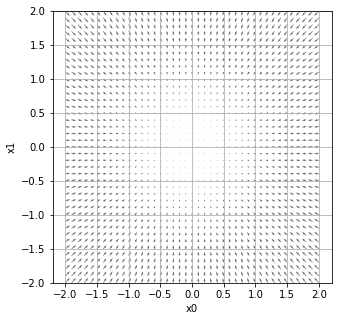

In [11]:
plt.figure(figsize=(5, 5))
plt.quiver(X0, X1, -gradients[0], -gradients[1],  angles="xy", color="#666666") 
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.draw()
plt.show()

## 위의 그래프에서 화살표가 가리키는 방향은 
## 각 장소에서 함수 f_2의 출력값을 가장 많이 줄이는 방향이다.

# Gradient descent with f_2

In [12]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [13]:
gradient_descent(f=f_2, init_x=np.array([-3.0,4.0]), lr=0.1)

array([-6.11110793e-10,  8.14814391e-10])

In [14]:
gradient_descent(f=f_2, init_x=np.array([-3.0,4.0]), lr=10.0)

array([-2.58983747e+13, -1.29524862e+12])

In [15]:
gradient_descent(f=f_2, init_x=np.array([-3.0,4.0]), lr=1e-10)

array([-2.99999994,  3.99999992])